# <center> <span style="color:#f6f794"> 📊 📊 📊 EDA 📊 📊 📊 </span> </center>

**Quick Summary:**

- Columns: 15
- Rows: 1,000
- Unique comments: 1,000
- Unique videos: 13
- Duplicates: 0
- Nulls: 0
- Data Type: ok ('comment_id', 'video_id', 'text' are object, the rest boolean)
____

### <span style="color:#f6f794"> 📚 Importing libraries and setting displays </span>

In [2]:
import pandas as pd
import numpy as np
import requests
import gzip
from io import BytesIO
import os
from pandas.tseries.offsets import DateOffset
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import time
import csv
import re

### <span style="color:#f6f794"> 📂 Opening files and create dataframes of them </span>

In [3]:
# Setting paths
current_dir = os.getcwd()                            # \sentiment-analyzer-inc\eda
print(current_dir)
parent_dir = os.path.dirname(current_dir)            # \sentiment-analyzer-inc
print(parent_dir)
data_dir = os.path.join(current_dir, "data")          # \sentiment-analyzer-inc\eda\data
print(data_dir)
cleaning_file_path = os.path.join(current_dir, "")      # \sentiment-analyzer-inc\eda\data\
print(cleaning_file_path)

c:\Users\yaelp\Desktop\Yael\Bootcamp_FactoriaF5_IA_Promo4\Proyectos\Grupales\sentiment-analyzer-inc\eda
c:\Users\yaelp\Desktop\Yael\Bootcamp_FactoriaF5_IA_Promo4\Proyectos\Grupales\sentiment-analyzer-inc
c:\Users\yaelp\Desktop\Yael\Bootcamp_FactoriaF5_IA_Promo4\Proyectos\Grupales\sentiment-analyzer-inc\eda\data
c:\Users\yaelp\Desktop\Yael\Bootcamp_FactoriaF5_IA_Promo4\Proyectos\Grupales\sentiment-analyzer-inc\eda\


In [11]:
GITHUB_CLEAN_URL = "https://raw.githubusercontent.com/Yael-Parra/sentiment-analyzer-inc/feature/eda/eda/data/youtube_dataset_cleaned.csv.gz"


def load_airbnb_data_from_github(url):
    """
    Downloading and processing Airbnb data from GitHub repository.
    """
    print("🔗 Downloading data from GitHub...")

    try:
        # Download the compressed CSV file from GitHub
        response = requests.get(url)
        response.raise_for_status()

        print("📊 Processing compressed file..")

        # Decompressing and reading the CSV file
        with gzip.open(BytesIO(response.content), 'rt', encoding='utf-8') as f:
            df = pd.read_csv(
                f,
                sep=',',                  # Specify the delimiter
                encoding='utf-8',         # Specify the encoding
                quoting=csv.QUOTE_MINIMAL # Specify the quoting behavior
                )

        print(f"✅ Data downloaded succesfully!")
        
        return df

    except requests.exceptions.RequestException as req_err:
        print(f"❌ Network/Request Error while downloading data: {req_err}")
        return None
    except Exception as e:
        print(f"❌ General Error while processing data: {e}")
        return None

# Creating dataframe from GitHub URL
df_clean_1 = load_airbnb_data_from_github(GITHUB_CLEAN_URL)

🔗 Downloading data from GitHub...
📊 Processing compressed file..
✅ Data downloaded succesfully!


#### <span style="color:#f3a006"> Boolean Columns Distribution </span> 

- **Percentage of true vs false**

| Column             | True (%) | False (%) |
|--------------------|----------|-----------|
| is_toxic           | 46.2     | 53.8      |
| is_abusive         | 35.3     | 64.7      |
| is_threat          | 2.1      | 97.9      |
| is_provocative     | 16.1     | 83.9      |
| is_obscene         | 10.0     | 90.0      |
| is_hatespeech      | 13.8     | 86.2      |
| is_racist          | 12.5     | 87.5      |
| is_nationalist     | 0.8      | 99.2      |
| is_sexist          | 0.1      | 99.9      |
| is_homophobic      | 0.0      | 100.0     |
| is_religious_hate  | 1.2      | 98.8      |
| is_radicalism      | 0.0      | 100.0     |

- **Useful for modeling**

| Correlation Level        | Columns                             | Notes                                             |
|--------------------------|-----------------------------------|---------------------------------------------------|
| **High correlation**     | ``is_toxic``, ``is_abusive``               | Strongly related; redundant but useful together  |
| **Moderate correlation** | ``is_provocative``, ``is_toxic`` (0.47)   | Useful signals, complement each other             |
| **Low/No correlation**   | ``is_nationalist``, ``is_sexist``, ``is_homophobic``, ``is_radicalism`` | Very low variance; provide little info, consider dropping or grouping |


In [16]:
# Checking the percentage of true and false boolean's columns

def check_boolean_percentage(df, column_name):
    df[column_name] = df[column_name].astype(bool)
    true_count = df[column_name].sum()
    total_count = df[column_name].count()
    false_count = total_count - true_count
    true_percentage = ((true_count / total_count) * 100).round(2)
    false_percentage = ((false_count / total_count) * 100).round(2)
    print(f"Column '{column_name}': True: {true_percentage}%  VS  False: {false_percentage}%")
 
# Checking boolean columns
check_boolean_percentage(df_clean_1, 'is_toxic')
check_boolean_percentage(df_clean_1, 'is_abusive')
check_boolean_percentage(df_clean_1, 'is_threat')
check_boolean_percentage(df_clean_1, 'is_provocative')
check_boolean_percentage(df_clean_1, 'is_obscene')
check_boolean_percentage(df_clean_1, 'is_hatespeech')
check_boolean_percentage(df_clean_1, 'is_racist')
check_boolean_percentage(df_clean_1, 'is_nationalist')
check_boolean_percentage(df_clean_1, 'is_sexist')
check_boolean_percentage(df_clean_1, 'is_homophobic')
check_boolean_percentage(df_clean_1, 'is_religious_hate')
check_boolean_percentage(df_clean_1, 'is_radicalism')

Column 'is_toxic': True: 46.2%  VS  False: 53.8%
Column 'is_abusive': True: 35.3%  VS  False: 64.7%
Column 'is_threat': True: 2.1%  VS  False: 97.9%
Column 'is_provocative': True: 16.1%  VS  False: 83.9%
Column 'is_obscene': True: 10.0%  VS  False: 90.0%
Column 'is_hatespeech': True: 13.8%  VS  False: 86.2%
Column 'is_racist': True: 12.5%  VS  False: 87.5%
Column 'is_nationalist': True: 0.8%  VS  False: 99.2%
Column 'is_sexist': True: 0.1%  VS  False: 99.9%
Column 'is_homophobic': True: 0.0%  VS  False: 100.0%
Column 'is_religious_hate': True: 1.2%  VS  False: 98.8%
Column 'is_radicalism': True: 0.0%  VS  False: 100.0%


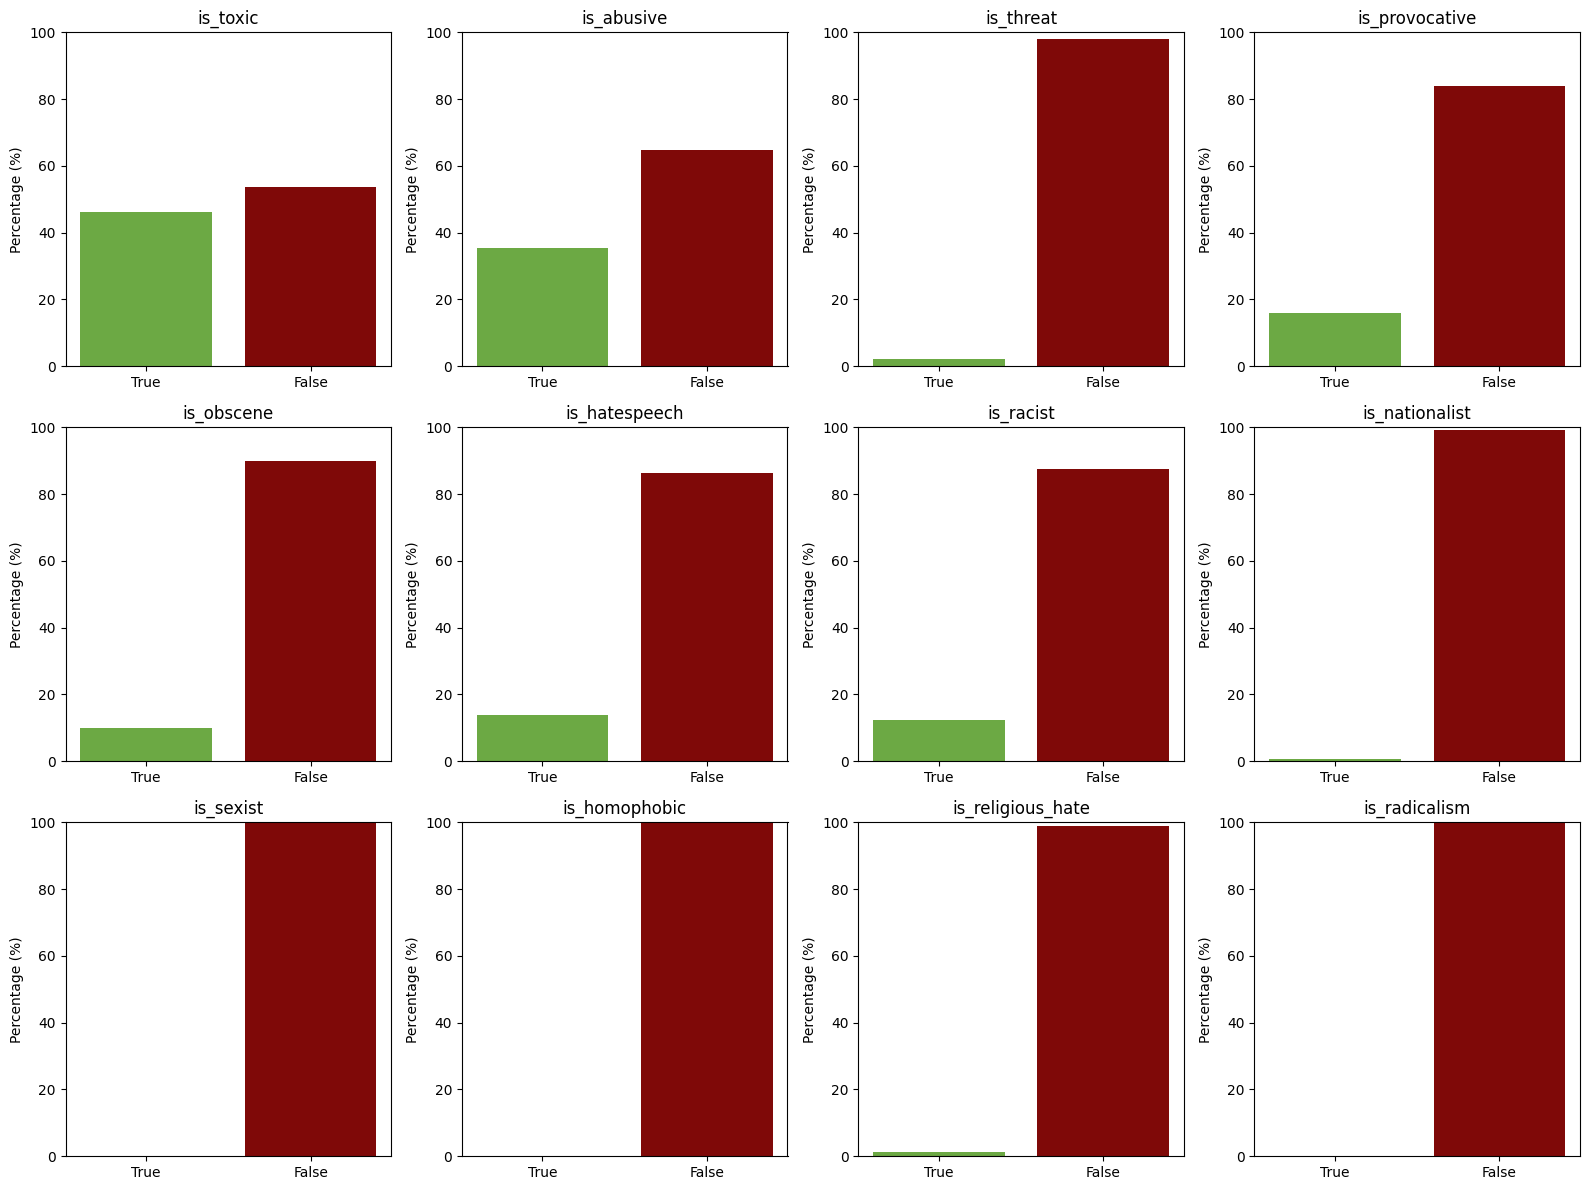

In [ ]:
# Graphing the percentage of true and false boolean's columns

def plot_all_booleans_together(df, bool_columns):
    n = len(bool_columns)
    ncols = 4  # 4 columnas por fila, ajusta según preferencia
    nrows = (n + ncols - 1) // ncols  # filas necesarias

    fig, axes = plt.subplots(nrows, ncols, figsize=(4 * ncols, 4 * nrows))
    axes = axes.flatten()

    for i, col in enumerate(bool_columns):
        df[col] = df[col].astype(bool)
        true_count = df[col].sum()
        total_count = df[col].count()
        false_count = total_count - true_count
        true_percentage = (true_count / total_count) * 100
        false_percentage = (false_count / total_count) * 100

        axes[i].bar(['True', 'False'], [true_percentage, false_percentage], color=['#6CA944', '#7F0908'])
        axes[i].set_title(f"{col}")
        axes[i].set_ylim(0, 100)
        axes[i].set_ylabel('Percentage (%)')

    # Ocultar ejes vacíos si los hay
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

# Lista de columnas booleanas
bool_cols = ['is_toxic', 'is_abusive', 'is_threat', 'is_provocative', 'is_obscene', 'is_hatespeech',
             'is_racist', 'is_nationalist', 'is_sexist', 'is_homophobic', 'is_religious_hate', 'is_radicalism']

plot_all_booleans_together(df_clean_1, bool_cols)

In [26]:
# Calculate pairwise correlations between booleans (to catch redundant features)
def calculate_boolean_correlations(df, bool_columns):
    df_bool = df[bool_columns].astype(bool)
    correlations = df_bool.corr()
    print("Pairwise correlations between boolean columns:")
    print(correlations)
calculate_boolean_correlations(df_clean_1, bool_cols)

Pairwise correlations between boolean columns:
                   is_toxic  is_abusive  is_threat  is_provocative  \
is_toxic           1.000000    0.797086   0.158048        0.472718   
is_abusive         0.797086    1.000000   0.198282        0.593057   
is_threat          0.158048    0.198282   1.000000        0.106626   
is_provocative     0.472718    0.593057   0.106626        1.000000   
is_obscene         0.359707    0.451277  -0.048820        0.089788   
is_hatespeech      0.431774   -0.119603   0.002063       -0.072719   
is_racist          0.407869   -0.121005  -0.034268       -0.075072   
is_nationalist     0.096908   -0.042843  -0.013152       -0.008796   
is_sexist          0.034142    0.042833  -0.004634       -0.013860   
is_homophobic           NaN         NaN        NaN             NaN   
is_religious_hate  0.118928   -0.042970   0.111962        0.001699   
is_radicalism           NaN         NaN        NaN             NaN   

                   is_obscene  is_hatespee

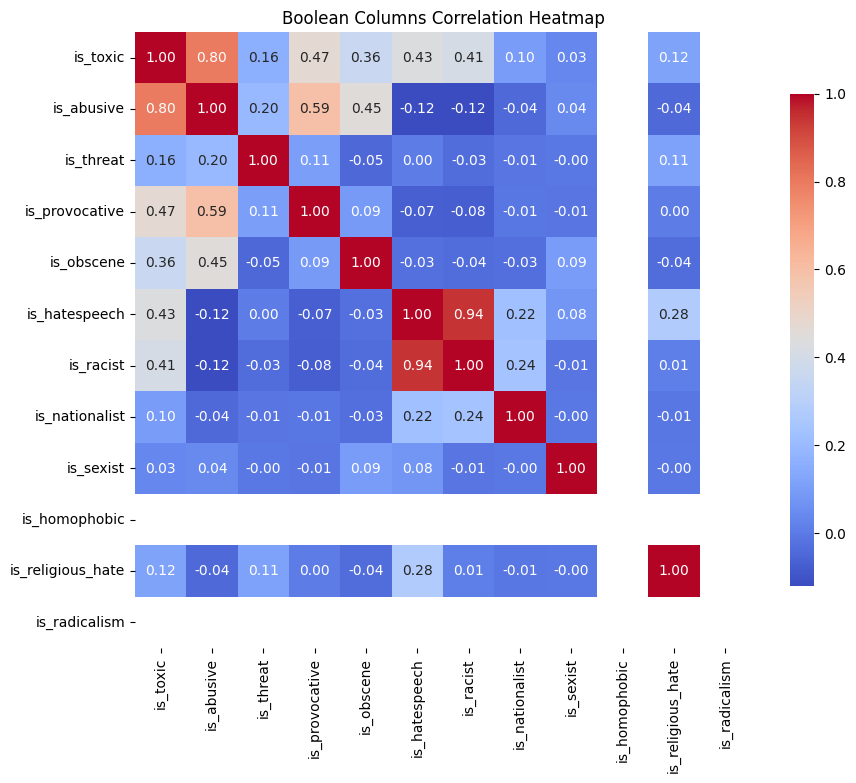

In [33]:
# Heatmap of boolean correlations
def plot_boolean_correlation_heatmap(df, bool_columns):
    df_bool = df[bool_columns].astype(bool)
    correlations = df_bool.corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={"shrink": .8})
    plt.title('Boolean Columns Correlation Heatmap')
    plt.show()  
plot_boolean_correlation_heatmap(df_clean_1, bool_cols)

In [ ]:
# Flag any boolean columns with extremely low variance for possible removal or special treatment
def flag_low_variance_booleans(df, bool_columns, threshold=0.01):
    low_variance_cols = []
    for col in bool_columns:
        variance = df[col].var()
        if variance < threshold:
            low_variance_cols.append(col)
    if low_variance_cols:
        print(f"Columns with low variance (< {threshold}): {low_variance_cols}")
    else:
        print("No columns with low variance found.")

flag_low_variance_booleans(df_clean_1, bool_cols)

Columns with low variance (< 0.01): ['is_nationalist', 'is_sexist', 'is_homophobic', 'is_radicalism']


#### <span style="color:#f3a006"> [`text`] data exploration </span> 

Length analysis: Compute length in characters and words per comment, plot histograms

Check for unusually short or empty comments, decide if any need filtering or flagging

Check for presence of special characters, URLs, emojis (which might influence sentiment)

Quick frequency analysis of most common words (raw, no cleaning yet)

(Optional) Simple n-gram extraction (bigrams or trigrams) to get a feel of common phrases

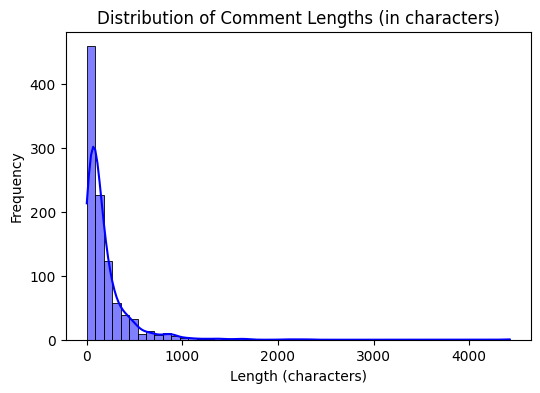

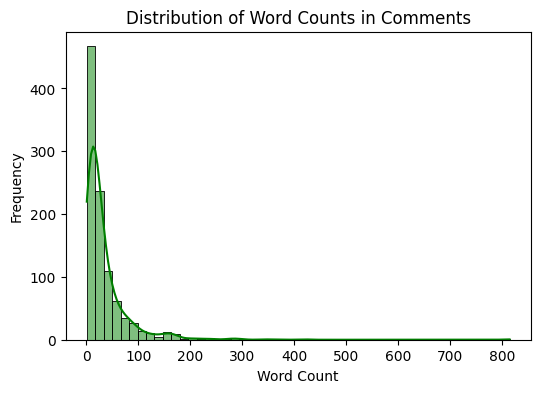

In [39]:
# Length analysis: Compute length in characters and words per comment, plot histograms

def analyze_comment_length(df):
    df['comment_length'] = df['text'].apply(lambda x: len(str(x)))    # How many characters in the comment
    df['word_count'] = df['text'].apply(lambda x: len(str(x).split())) # How many words in the comment

    plt.figure(figsize=(6, 4))
    sns.histplot(df['comment_length'], bins=50, kde=True, color='blue')
    plt.title('Distribution of Comment Lengths (in characters)')
    plt.xlabel('Length (characters)')
    plt.ylabel('Frequency')
    plt.show()

    plt.figure(figsize=(6, 4))
    sns.histplot(df['word_count'], bins=50, kde=True, color='green')
    plt.title('Distribution of Word Counts in Comments')
    plt.xlabel('Word Count')
    plt.ylabel('Frequency')
    plt.show()

analyze_comment_length(df_clean_1)


In [56]:
df_clean_1[["text", "comment_length", "word_count"]]

# Check the column tex qhen word count is 0
df_clean_1[df_clean_1['word_count'] == 0][["text", "comment_length", "word_count"]] # There are none

# Check the column tex qhen word count is 1
df_clean_1[df_clean_1['word_count'] == 1][["text", "comment_length", "word_count"]] # Only 12 rows and all are valid comments
# Check the column tex qhen word count is 2
df_clean_1[df_clean_1['word_count'] == 2][["text", "comment_length", "word_count"]] # Only 22 rows and all are valid comments

# Check the top 10 comments with the most words
df_clean_1.nlargest(10, 'word_count')[['video_id', 'text', 'word_count']] # Results are valid comments

# Check the top 10 video_id's texts with largest number of word_count
df_clean_1.nlargest(10, 'word_count')[['video_id', 'text', 'word_count']].groupby('video_id').agg({'text': 'first', 'word_count': 'sum'}) # This checking was useless

# Check the video_id's in ascendant order with the most qty of comment_id (since comment_id are all unique vlues) Le'ts check which are the most popular videos or with more comments
def most_popular_videos(df, top_n=13):
    popular_videos = df['video_id'].value_counts().head(top_n)
    print("Most popular videos by comment count:")
    print(popular_videos)   
most_popular_videos(df_clean_1, top_n=13) # There are only 13 unique videos in the dataset

Most popular videos by comment count:
video_id
9pr1oE34bIM    274
04kJtp6pVXI    172
cT14IbTDW2c    146
dG7mZQvaQDk    112
TZxEyoplYbI    104
bUgKZMSxr3E     39
8HB18hZrhXc     38
4rCweDxDqdw     37
Dt9-byUhPdg     34
#NAME?          16
dDbRyFIkNII     10
XRuCW80L9mA     10
5vF4si3hoRA      8
Name: count, dtype: int64


In [ ]:
# Columns to drop at the end because they were only usefull for the eda: comment_length ,  word_count

Index(['comment_id', 'video_id', 'text', 'is_toxic', 'is_abusive', 'is_threat',
       'is_provocative', 'is_obscene', 'is_hatespeech', 'is_racist',
       'is_nationalist', 'is_sexist', 'is_homophobic', 'is_religious_hate',
       'is_radicalism', 'comment_length', 'word_count'],
      dtype='object')